# The 10-armed Testbed

["Reinforcement learning: An Introduction"](http://incompleteideas.net/book/RLbook2018.pdf)\
Chapter 2. Multi-armed Bandits => 2.3. The 10-armed Testbed (Page 28)

## Bandit Environment

In [27]:
import numpy as np

class Bandit:
    def __init__(self, k):
        self.k = k
        self.mu = np.random.normal(0, 1, k)
        
    def pull(self, k):
        return np.random.normal(self.mu[k],1)

## Bandit Agent

In [28]:
class BanditAgent:
    def __init__(self, k, epsilon=0.1):
        self.k = k
        self.epsilon = epsilon
        self.actions = np.arange(k)
        
        self.Q = []
        self.N = []
        self.reset_agent()
    
    def reset_agent(self):
        self.Q = np.zeros(self.k) + np.random.rand(self.k)*0.01
        self.N = np.zeros(self.k)
        
    def choose_action(self):
        if np.random.rand(1) > self.epsilon:
            return np.argmax(self.Q)
        else:
            return np.random.choice(self.actions)
    
    def learn(self, action, reward):
        self.N[action] += 1
        self.Q[action] = self.Q[action] + 1/self.N[action]*(reward-self.Q[action])

## Training

In [53]:
k = 10
bandit = Bandit(k=k)
agent = BanditAgent(k=k)
episodes = 1001

history = []

for episode in range(episodes):
    action = agent.choose_action()
    reward = bandit.pull(action)
    agent.learn(action, reward)
    
    history.append(reward)
    if episode % 100 == 0:
        print(f'episode n°{episode}, mean cumulative reward = {np.mean(history[-100:])}')

episode n°0, mean cumulative reward = 0.7129722683560068
episode n°100, mean cumulative reward = 1.248281533610782
episode n°200, mean cumulative reward = 1.433874875055024
episode n°300, mean cumulative reward = 1.343133407870925
episode n°400, mean cumulative reward = 1.4066704152631393
episode n°500, mean cumulative reward = 1.3175564699979392
episode n°600, mean cumulative reward = 1.4010037076956072
episode n°700, mean cumulative reward = 1.3814160244356979
episode n°800, mean cumulative reward = 1.1284649775493127
episode n°900, mean cumulative reward = 1.4653975887189652
episode n°1000, mean cumulative reward = 1.2651804064080572


## Graph from the book

In [49]:
iterations = 2000  # Averaged over N iterations
steps = 1000  # Number of steps in an episode
k = 10  # Number of arms

for epsilon in [0, 0.1, 0.01]:
    history = np.zeros(steps)
    
    for i in range(iterations):  # They averaged it over 2000 runs
        bandit = Bandit(k=k)
        agent = BanditAgent(k=k, epsilon=epsilon)

        for step in range(steps):
            action = agent.choose_action()
            reward = bandit.pull(action)
            agent.learn(action, reward)
            history[step] += reward/iterations
    
    if epsilon == 0:
        history1 = history
    if epsilon == 0.01:
        history2 = history
    if epsilon == 0.1:
        history3 = history

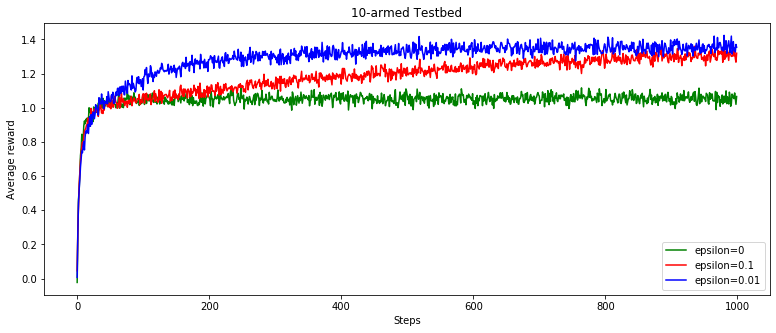

In [52]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (13,5)

plt.title('10-armed Testbed')
plt.ylabel('Average reward')
plt.xlabel('Steps')
plt.plot(history1, color='green')
plt.plot(history2, color='red')
plt.plot(history3, color='blue')

plt.legend(['epsilon=0', 'epsilon=0.1', 'epsilon=0.01'], loc='lower right')
plt.show()